In [1]:
import math  as m
import numpy as np
import pandas as pd

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib as mpl

# działania na łańcuchach znaków
import string

# statystyka
import statistics as st

# pomar czasu
import time

# dopasowywanie krzywych do danych
from scipy.optimize import curve_fit

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm

# dla wykresów trzywymiarowych
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
stars = pd.read_csv('hygdata_v3.csv')
pd.set_option("display.max_columns", None)
stars

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,pmra,pmdec,rv,mag,absmag,spect,ci,x,y,z,vx,vy,vz,rarad,decrad,pmrarad,pmdecrad,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,0.00,0.00,0.0,-26.70,4.850,G2V,0.656,0.000005,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,-5.20,-1.88,0.0,9.10,2.390,F5,0.482,219.740502,0.003449,4.177065,4.000000e-08,-0.000006,-2.000000e-06,0.000016,0.019007,-2.521031e-08,-9.114497e-09,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,181.21,-0.93,0.0,9.27,5.866,K3V,0.999,45.210918,0.003365,-16.008996,-7.000000e-08,0.000042,-2.000000e-07,0.000074,-0.340319,8.785309e-07,-4.508767e-09,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,5.24,-2.91,0.0,6.61,-1.619,B9,-0.019,344.552785,0.030213,277.614965,3.920000e-06,0.000011,-4.860000e-06,0.000088,0.678222,2.540424e-08,-1.410808e-08,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,62.85,0.16,0.0,8.06,2.421,F0V,0.370,82.835513,0.012476,-105.619540,8.000000e-08,0.000041,6.000000e-08,0.000149,-0.905713,3.047054e-07,7.757010e-10,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119609,119611,NaN,NaN,NaN,NN 4381,NaN,NaN,23.963895,38.629391,16.9492,-162.63,-162.63,0.0,12.64,11.494,m,NaN,13.240128,-0.125297,10.581054,8.220000e-06,-0.000013,-1.044000e-05,6.273733,0.674210,-7.884525e-07,-7.884719e-07,NaN,NaN,NaN,1,119611,NaN,0.002200,NaN,NaN,NaN
119610,119612,NaN,NaN,NaN,NN 4385,NaN,NaN,23.996567,47.762093,16.7224,864.68,-210.78,0.0,16.10,14.984,m,1.870,11.240971,-0.008954,12.380596,1.273000e-05,0.000070,-1.149000e-05,6.282287,0.833606,4.192087e-06,-1.021915e-06,NaN,NaN,NaN,1,119612,NaN,0.000088,NaN,NaN,NaN
119611,119613,NaN,NaN,NaN,NN 4386,NaN,NaN,23.996218,-44.067905,18.5185,-18.83,269.34,0.0,12.82,11.482,M7,1.640,13.305832,-0.013199,-12.879810,1.682000e-05,-0.000002,1.737000e-05,6.282195,-0.769130,-9.129042e-08,1.305807e-06,NaN,NaN,NaN,1,119613,NaN,0.002224,NaN,NaN,NaN
119612,119614,NaN,NaN,NaN,NN 4387,NaN,NaN,23.997386,-34.111986,12.8205,715.88,-624.51,0.0,12.80,12.260,M4,NaN,10.614642,-0.006882,-7.189893,-2.172000e-05,0.000045,-3.214000e-05,6.282501,-0.595366,3.470684e-06,-3.027691e-06,NaN,NaN,NaN,1,119614,NaN,0.001086,NaN,NaN,NaN


In [3]:
stars.columns

Index(['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')

In [4]:
nstars = stars.drop(columns=['dist','id','hip','proper', 'hd', 'hr', 'gl', 'bf', 'ra',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'bayer',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'dec',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'])

In [5]:
nstars

,x,y,z
0,0.000005,0.000000,0.000000
1,219.740502,0.003449,4.177065
2,45.210918,0.003365,-16.008996
3,344.552785,0.030213,277.614965
4,82.835513,0.012476,-105.619540
...,...,...,...
119609,13.240128,-0.125297,10.581054
119610,11.240971,-0.008954,12.380596
119611,13.305832,-0.013199,-12.879810
119612,10.614642,-0.006882,-7.189893


In [6]:
# a = nstars.iloc[59707:59807]
a = nstars.iloc[:10000]
dane = np.array(a)

In [7]:
len(dane)

10000

In [8]:
def eucl(p1,p2): # kwadrat odległości euklidesowej
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2

In [9]:
d=10000.    # clustering scale 
eps=.7      # initial learning speed 
fac=4

for r in range(50):            # rounds 
    eps=0.95*eps                  # decrease the learning speed 
    np.random.shuffle(dane)       # shuffle the sample 
    if r==0:                      # in the first round 
        R=np.array([dane[0]])     # R - array of representative points 
                                  # initialized to the first data point 
    for i in range(len(dane)):    # loop over the sample points 
        p=dane[i]                 # new data point 
        dist=[eucl(p,R[k]) for k in range(len(R))] 
          # array of squares of distances of p from the current repr. points in R 
        ind_min = np.argmin(dist)    # index of the closest repr. point 
        if dist[ind_min] > (1+fac*eps)*d*d:      # if its distance square > d*d 
                                     # dynamical creation of a new category 
            R=np.append(R, [p], axis=0)       # add new repr. point to R 
        else: 
            R[ind_min]+=eps*(p-R[ind_min])    # otherwise, apdate the "old" repr. point
                
print("Number of representative points: ",len(R))

Number of representative points:  20


In [10]:
R

array([[ 1.96508525e+02,  5.51034444e+01,  3.94244438e+01],
       [ 6.02182821e+04,  3.00168329e+04,  4.81936830e+04],
       [ 5.80499851e+04,  1.74280901e+04,  2.52448066e+04],
       [ 8.73873522e+04,  3.83228613e+04,  6.08783134e+02],
       [ 9.52186308e+04,  1.52731516e+04,  3.56895728e+03],
       [ 8.35037922e+04,  7.83046427e+03, -1.27460463e+04],
       [ 9.44560046e+04,  3.69590582e+03,  2.46677277e+02],
       [ 5.47780112e+04,  4.16622579e+03,  5.83942206e+04],
       [ 4.14193155e+04,  1.99297456e+04,  7.50612341e+04],
       [ 7.34756721e+04,  1.54185506e+04,  1.35317084e+04],
       [ 6.69454952e+04,  5.91141044e+03,  1.41123454e+04],
       [ 4.96033680e+04,  2.51206896e+04,  6.91933568e+04],
       [ 8.31950265e+04,  2.37758491e+04, -4.65441695e+03],
       [ 7.41062454e+04,  3.87859034e+04, -8.78313182e+03],
       [ 4.83379313e+04,  1.20586070e+04,  5.91673670e+04],
       [ 2.96862391e+04,  1.05554142e+04, -3.27810342e+04],
       [ 4.20793257e+04,  4.50076009e+03

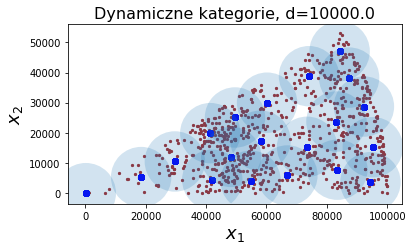

In [11]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
plt.title("Dynamiczne kategorie, d="+str(d),fontsize=16) 
#plt.xlim(-1500,2500)
#plt.ylim(-3000,3000)

    
plt.scatter(dane[:,0],dane[:,1],c='brown', s=5)

for k in range(len(R)):
    plt.scatter(R[:,0],R[:,1],c='blue')

for k in range(len(R)):
    circ=Circle((R[k][0],R[k][1]), d, alpha=0.2)   
    ax.add_patch(circ)

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)

plt.show()